<a href="https://colab.research.google.com/github/gabgovar/Apache-Spark/blob/main/Otimiza%C3%A7%C3%A3o_de_neuronios_na_camada_oculta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rede neural

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

In [ ]:
data = [
    ['Sugar cane bagasse', 50.00],
    ['Sewage sludge', 18.40],
    ['Sugar cane straw waste', 31.30],
    ['Coffee waste', 8.88],
    ['Eucalyptus waste', 7.73],
    ['MSW', 49.16],
    ['Orange bagasse', 9.23],
    ['Corn waste', 60.29],
]

df_name = pd.DataFrame(data, columns=['biomass', 'Moisture'])

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Suponha que você tenha um dataframe chamado 'dados'
# Substitua esta linha pelo seu dataframe real
dados = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")

In [12]:
resultado = pd.merge(dados, df_name, on='Moisture', how='inner')

In [13]:
resultado.head()

,Unnamed: 0,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,...,y_H2,y_CH4,y_N2,y_H2O,LHV,HHV,mass_flow,mole_flow,Exergy_ph,biomass
0,127,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.451795,0.024393,0.000036,0.187075,11315.6391,13214.3378,122429.186,7500.12506,1189.63145,Sugar cane bagasse
1,126,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.448909,0.021661,0.000035,0.200919,10998.8271,12915.0973,126101.732,7734.79767,1398.41332,Sugar cane bagasse
2,125,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.445278,0.019259,0.000034,0.215015,10688.6209,12621.9763,129890.308,7973.08767,1628.03669,Sugar cane bagasse
3,124,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.441010,0.017144,0.000033,0.229302,10385.2845,12335.2441,133796.963,8215.36964,1878.84587,Sugar cane bagasse
4,123,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.436200,0.015279,0.000032,0.243719,10089.1002,12055.1848,137822.660,8461.93577,2151.05565,Sugar cane bagasse


In [ ]:
dados.columns

Index(['Unnamed: 0', 'T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material',
       'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air',
       'sb_ratio', 'm_CO', 'm_CO2', 'm_H2', 'm_CH4', 'm_N2', 'm_H2O', 'x_CO',
       'x_CO2', 'x_H2', 'x_CH4', 'x_N2', 'x_H2O', 'n_CO', 'n_CO2', 'n_H2',
       'n_CH4', 'n_N2', 'n_H2O', 'y_CO', 'y_CO2', 'y_H2', 'y_CH4', 'y_N2',
       'y_H2O', 'LHV', 'HHV', 'mass_flow', 'mole_flow', 'Exergy_ph'],
      dtype='object')

In [14]:
dadosN = resultado.iloc[:,[-1] + list(range(1, 13)) + [31] + [33] + [34] + [37] + [38] ]

In [18]:
dadosN.shape

(6720, 18)

In [15]:
dadosN.columns

Index(['biomass', 'T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash',
       'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air',
       'sb_ratio', 'y_CO', 'y_H2', 'y_CH4', 'LHV', 'HHV'],
      dtype='object')

In [16]:
dadosN.head()

,biomass,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Temp_air,sb_ratio,y_CO,y_H2,y_CH4,LHV,HHV
0,Sugar cane bagasse,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.60,0.197997,0.451795,0.024393,11315.6391,13214.3378
1,Sugar cane bagasse,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.65,0.189135,0.448909,0.021661,10998.8271,12915.0973
2,Sugar cane bagasse,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.70,0.180716,0.445278,0.019259,10688.6209,12621.9763
3,Sugar cane bagasse,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.75,0.172712,0.441010,0.017144,10385.2845,12335.2441
4,Sugar cane bagasse,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.80,0.165099,0.436200,0.015279,10089.1002,12055.1848


In [ ]:
# Calcular a média e o desvio padrão da coluna "valor"
media = dadosN['y_H2'].mean()
desvio_padrao = dadosN['y_H2'].std()

In [ ]:
# Definir um limite para identificar outliers (por exemplo, 2 desvios padrão)
limite_superior = media + 2 * desvio_padrao
limite_inferior = media - 2 * desvio_padrao

In [ ]:
# Filtrar os outliers e criar um novo dataframe limpo
dados_limpos = dadosN[(dadosN['y_H2'] >= limite_inferior) & (dadosN['y_H2'] <= limite_superior)]

In [ ]:
# Visualizar o dataframe limpo
dadosN = dados_limpos
dadosN.head()

,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Temp_air,sb_ratio,y_H2
0,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.60,0.451795
1,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.65,0.448909
2,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.70,0.445278
3,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.75,0.441010
4,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,44.95,400.0,0.80,0.436200


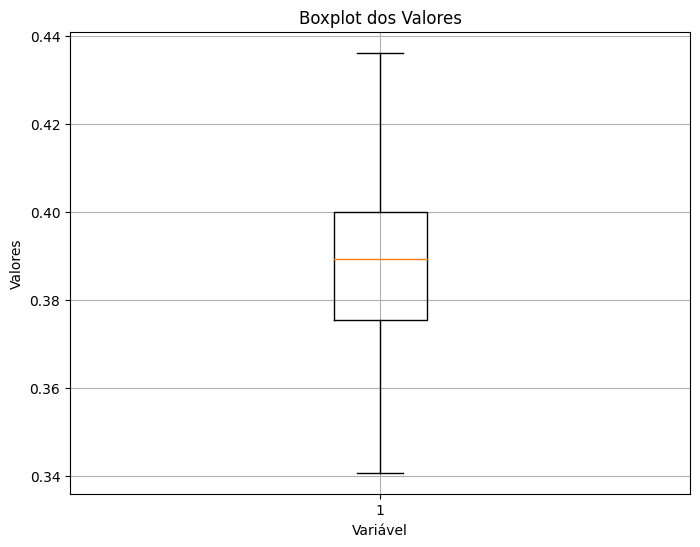

In [ ]:
# Criar um boxplot dos dados
dadosN = dadosN[(dadosN['y_H2'] <= 0.437) & (dadosN['y_H2'] >= 0.34)]
plt.figure(figsize=(8, 6))  # Tamanho opcional da figura
plt.boxplot(dadosN['y_H2'])
plt.title('Boxplot dos Valores')
plt.xlabel('Variável')
plt.ylabel('Valores')
plt.grid(True)
plt.show()

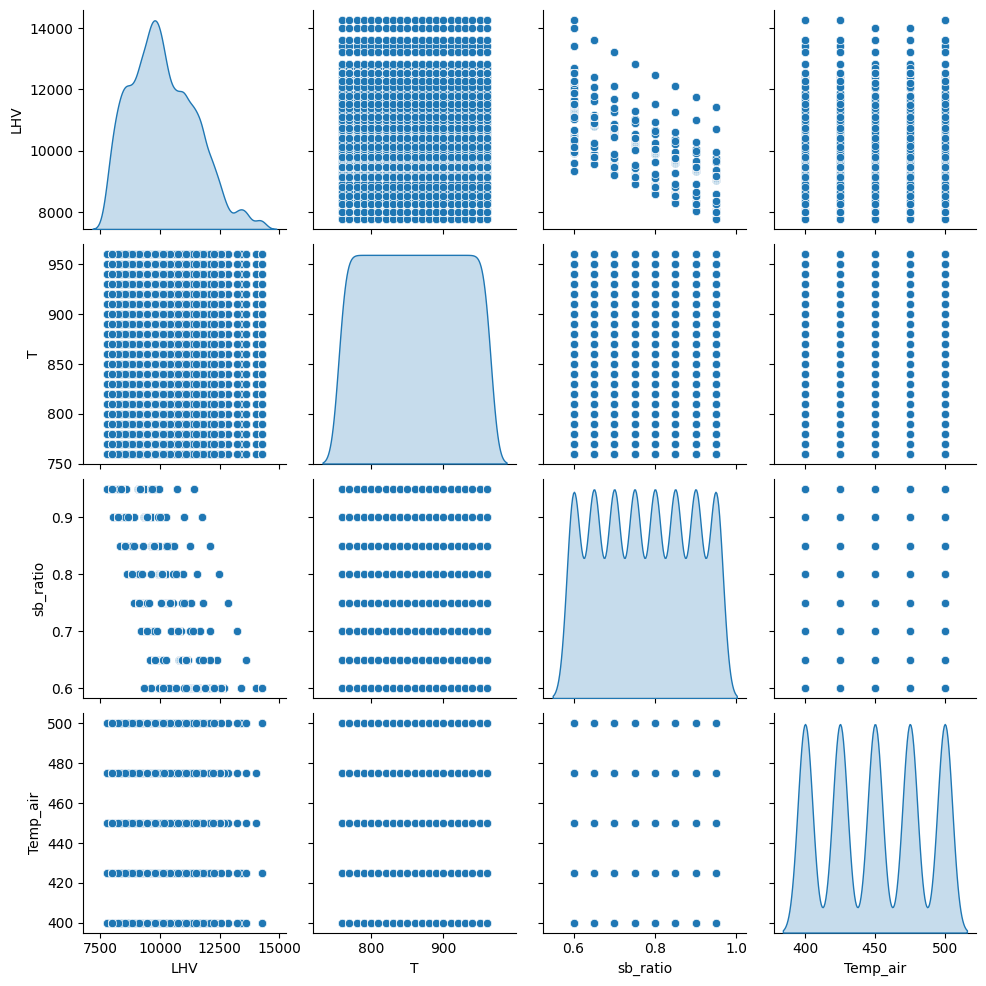

In [ ]:
import seaborn as sns
sns.pairplot(dadosN[["LHV", "T", "sb_ratio", "Temp_air"]], diag_kind="kde")

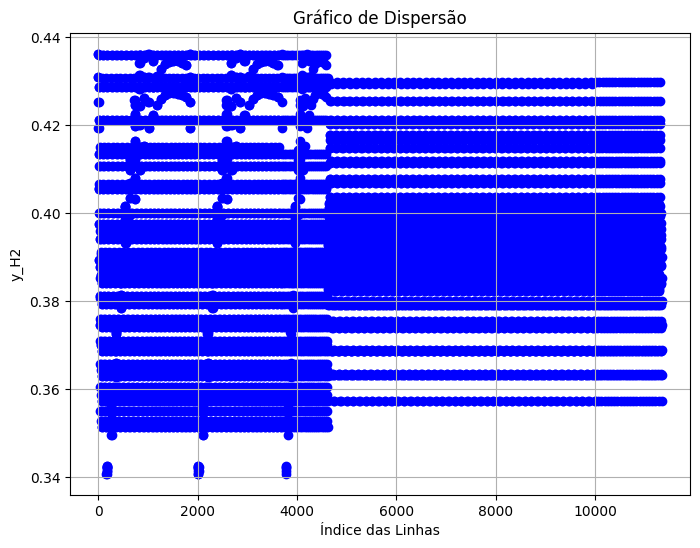

In [ ]:
# Calcular o número de linhas

# dadosN = dadosN[(dadosN['LHV'] >= 13) & (dadosN['y_H2'] <= 0.43)]

num_linhas = len(dadosN)

# Criar um gráfico de dispersão
plt.figure(figsize=(8, 6))  # Tamanho opcional da figura
plt.scatter(range(num_linhas), dadosN['y_H2'], marker='o', color='blue')
plt.title('Gráfico de Dispersão')
plt.xlabel('Índice das Linhas')
plt.ylabel('y_H2')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

train_dataset = dadosN.sample(frac=0.7,random_state=0)
test_dataset = dadosN.drop(train_dataset.index)

# Agora você tem X_treino (características de treinamento), X_teste (características de teste),
# y_treino (variável de destino de treinamento) e y_teste (variável de destino de teste)

In [ ]:
train_stats = train_dataset.describe()
train_stats.pop("y_H2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
T,7940.0,859.384131,60.201710,760.00,810.00,860.00,910.00,960.00
Moisture,7940.0,12.333257,10.748298,5.22,7.73,8.30,9.70,60.29
Fixed_Carbon,7940.0,22.048343,15.456003,7.60,14.48,17.00,21.60,73.20
Volatile_Material,7940.0,71.271034,15.182651,20.60,72.70,74.91,78.18,84.22
Ash,7940.0,5.449746,6.513701,0.00,2.14,3.20,5.86,27.50
Carbon,7940.0,48.598594,4.407395,33.90,47.12,48.79,50.47,53.97
Hydrogen,7940.0,6.304622,0.743969,5.54,5.78,6.12,6.30,8.13
Nitrogen,7940.0,1.737645,2.242433,0.17,0.36,0.80,1.70,8.01
Sulfur,7940.0,0.137664,0.201617,0.00,0.00,0.04,0.19,0.80
Oxygen,7940.0,38.742933,5.425050,25.50,37.06,40.00,43.24,44.95


In [ ]:
train_labels = train_dataset.pop('y_H2')
test_labels = test_dataset.pop('y_H2')

In [ ]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

normed_train_data.head()

,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Temp_air,sb_ratio
184,-1.484744,-0.321284,-0.489670,0.301592,-0.715376,0.165950,-0.597635,-0.480570,-0.484403,0.828945,0.002136,-1.548450
11326,0.674663,-0.375246,-0.326627,0.430028,-0.038342,-0.335480,-0.705166,-0.565299,0.259583,0.460285,0.708710,1.071902
5350,1.671312,-0.288721,3.309501,-3.337430,0.115181,-0.498842,-1.027760,-0.016788,-0.682799,0.259365,-0.704439,1.071902
3245,-0.986419,1.764628,-0.598366,0.192915,1.159134,0.091075,-0.947112,-0.418137,0.805173,0.969036,0.708710,0.635177
4379,0.508555,0.564438,-0.934805,-0.419626,3.385211,-3.334985,-0.006213,1.847260,2.640339,-2.441071,0.708710,-0.238274


In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Selecionar apenas as colunas de características para normalização
colunas_para_normalizar = ['T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen']

# Aplicar o MinMax Scaling nas colunas de características
scaler = MinMaxScaler()
normed_train_data[colunas_para_normalizar] = scaler.fit_transform(train_dataset[colunas_para_normalizar])
normed_test_data[colunas_para_normalizar] = scaler.fit_transform(test_dataset[colunas_para_normalizar])

normed_train_data.head()

,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,Oxygen,Temp_air,sb_ratio
184,0.05,0.066461,0.104878,0.868438,0.028727,0.768809,0.123552,0.062500,0.0500,0.912082,0.002136,-1.548450
11326,0.70,0.055929,0.143293,0.899088,0.189091,0.658695,0.092664,0.038265,0.2375,0.809254,0.708710,1.071902
5350,1.00,0.072816,1.000000,0.000000,0.225455,0.622820,0.000000,0.195153,0.0000,0.753213,-0.704439,1.071902
3245,0.20,0.473579,0.079268,0.842502,0.472727,0.752367,0.023166,0.080357,0.3750,0.951157,0.708710,0.635177
4379,0.65,0.239332,0.000000,0.696322,1.000000,0.000000,0.293436,0.728316,0.8375,0.000000,0.708710,-0.238274


In [ ]:
def build_model():
  model = keras.Sequential([
    layers.Dense(12, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01),
                 input_shape=[len(train_dataset.keys())]),
    layers.Dense(8, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01)),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras import layers
from tensorflow.keras import activations
model = build_model()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                156       
                                                                 
 dense_9 (Dense)             (None, 8)                 104       
                                                                 
 dense_10 (Dense)            (None, 1)                 9         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 269 (1.05 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
example_batch = normed_train_data[:10]
example_result = model.predict(example_batch)
example_result

1/1 [==============================] - 0s 59ms/step


array([[0.04189347],
       [0.04680125],
       [0.04644806],
       [0.04365192],
       [0.04932176],
       [0.04672953],
       [0.03853392],
       [0.04255987],
       [0.04531769],
       [0.04309444]], dtype=float32)

In [ ]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [MPG]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  plt.ylim([0, ylim()[1]])
  plt.legend()


  plt.show()

In [ ]:
model = build_model()

# O parâmetro patience é o quantidade de epochs para checar as melhoras
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
EPOCHS = 200
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS,
                    validation_split = 0.2, verbose=1,)

Epoch 1/200
199/199 [==============================] - 1s 3ms/step - loss: 0.1572 - mae: 0.1587 - mse: 0.0393 - val_loss: 0.0488 - val_mae: 0.0151 - val_mse: 3.5520e-04
Epoch 2/200
199/199 [==============================] - 1s 3ms/step - loss: 0.0193 - mae: 0.0149 - mse: 3.5798e-04 - val_loss: 0.0031 - val_mae: 0.0156 - val_mse: 3.8220e-04
Epoch 3/200
199/199 [==============================] - 1s 3ms/step - loss: 8.6365e-04 - mae: 0.0152 - mse: 3.7092e-04 - val_loss: 3.8643e-04 - val_mae: 0.0158 - val_mse: 3.8640e-04
Epoch 4/200
199/199 [==============================] - 1s 3ms/step - loss: 3.6973e-04 - mae: 0.0152 - mse: 3.6970e-04 - val_loss: 3.8668e-04 - val_mae: 0.0158 - val_mse: 3.8664e-04
Epoch 5/200
199/199 [==============================] - 1s 3ms/step - loss: 3.6836e-04 - mae: 0.0151 - mse: 3.6834e-04 - val_loss: 3.7884e-04 - val_mae: 0.0156 - val_mse: 3.7884e-04
Epoch 6/200
199/199 [==============================] - 1s 3ms/step - loss: 3.6959e-04 - mae: 0.0152 - mse: 3.6957e-

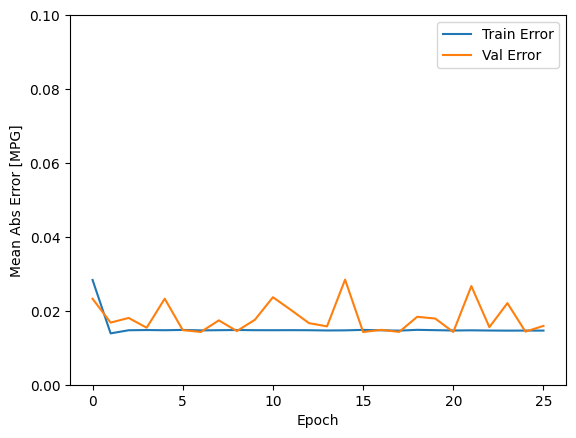

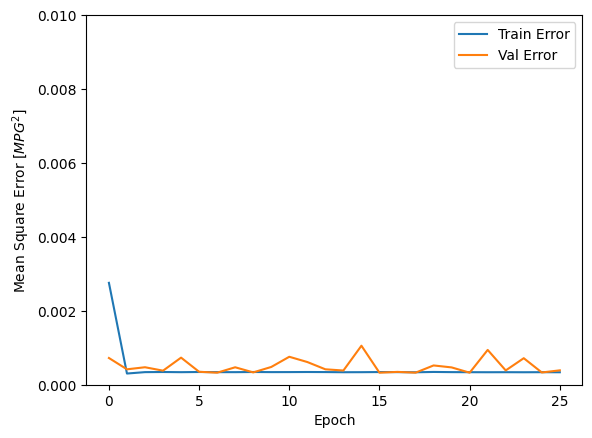

In [ ]:
plot_history(history)

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} MPG".format(mae))

126/126 - 0s - loss: 150618.5625 - mae: 158.8640 - mse: 150604.0312 - 185ms/epoch - 1ms/step
Testing set Mean Abs Error: 158.86 MPG


107/107 [==============================] - 0s 1ms/step


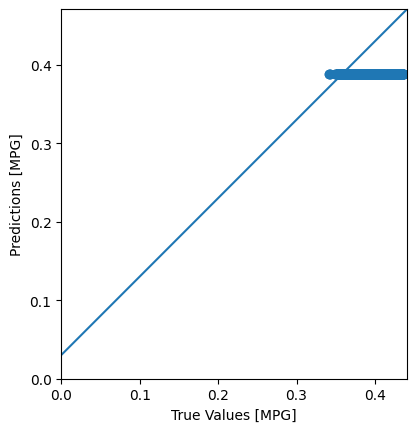

In [ ]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, plt.xlim()[1]], [-100, plt.ylim()[1]])

In [ ]:
# Calcular a média dos valores reais
y_mean = np.mean(dadosN['LHV'])

# Calcular a soma total dos quadrados (TSS)
tss = np.sum((dadosN['LHV'] - y_mean) ** 2)

# Calcular a soma dos quadrados da regressão (SSR)
ssr = np.sum((test_predictions - y_mean) ** 2)

# Calcular o R²
r_squared = 1 - (ssr / tss)

print("Coeficiente de determinação R²:", r_squared)

Coeficiente de determinação R²: 0.35732479230598824


In [ ]:
# Calcular a média dos valores reais
y_mean = np.mean(dadosN['LHV'])

# Calcular a soma total dos quadrados (TSS)
tss = np.sum((dadosN['LHV'] - y_mean) ** 2)

# Calcular a soma dos quadrados da regressão (SSR)
ssr = np.sum((test_predictions - y_mean) ** 2)

# Calcular o R²
r_squared = 1 - (ssr / tss)

print("Coeficiente de determinação R²:", r_squared)

Coeficiente de determinação R²: 0.35732479230598824


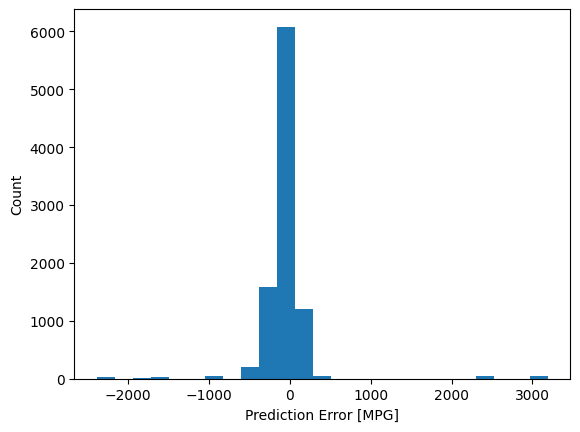

In [ ]:
error = train_predictions - train_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")

# Analise de Sensibilidade

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Suponha que você tenha um dataframe chamado 'dados'
# Substitua esta linha pelo seu dataframe real
dados = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")

In [ ]:
dados.head()

,Unnamed: 0,T,Moisture,Fixed_Carbon,Volatile_Material,Ash,Carbon,Hydrogen,Nitrogen,Sulfur,...,y_CO2,y_H2,y_CH4,y_N2,y_H2O,LHV,HHV,mass_flow,mole_flow,Exergy_ph
0,127,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.138704,0.451795,0.024393,0.000036,0.187075,11315.6391,13214.3378,122429.186,7500.12506,1189.63145
1,126,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.139341,0.448909,0.021661,0.000035,0.200919,10998.8271,12915.0973,126101.732,7734.79767,1398.41332
2,125,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.139697,0.445278,0.019259,0.000034,0.215015,10688.6209,12621.9763,129890.308,7973.08767,1628.03669
3,124,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.139799,0.441010,0.017144,0.000033,0.229302,10385.2845,12335.2441,133796.963,8215.36964,1878.84587
4,123,760.0,50.0,14.32,83.54,2.14,46.7,6.02,0.17,0.02,...,0.139670,0.436200,0.015279,0.000032,0.243719,10089.1002,12055.1848,137822.660,8461.93577,2151.05565


In [ ]:
dados.columns 1 11 12 36 31

Index(['Unnamed: 0', 'T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material',
       'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air',
       'sb_ratio', 'm_CO', 'm_CO2', 'm_H2', 'm_CH4', 'm_N2', 'm_H2O', 'x_CO',
       'x_CO2', 'x_H2', 'x_CH4', 'x_N2', 'x_H2O', 'n_CO', 'n_CO2', 'n_H2',
       'n_CH4', 'n_N2', 'n_H2O', 'y_CO', 'y_CO2', 'y_H2', 'y_CH4', 'y_N2',
       'y_H2O', 'LHV', 'HHV', 'mass_flow', 'mole_flow', 'Exergy_ph'],
      dtype='object')

In [ ]:
dadosN = dados.iloc[:, [1] + [2] + [6] + [11] + [12] + list(range(31, 37))]

In [ ]:
dadosN.head()

,T,Moisture,Carbon,Temp_air,sb_ratio,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O
0,760.0,50.0,46.7,400.0,0.60,0.197997,0.138704,0.451795,0.024393,0.000036,0.187075
1,760.0,50.0,46.7,400.0,0.65,0.189135,0.139341,0.448909,0.021661,0.000035,0.200919
2,760.0,50.0,46.7,400.0,0.70,0.180716,0.139697,0.445278,0.019259,0.000034,0.215015
3,760.0,50.0,46.7,400.0,0.75,0.172712,0.139799,0.441010,0.017144,0.000033,0.229302
4,760.0,50.0,46.7,400.0,0.80,0.165099,0.139670,0.436200,0.015279,0.000032,0.243719


In [ ]:
dadosN_770 = dadosN[(dadosN['T']) >= 770]

In [ ]:
# Criar um dataframe com o nome das biomassas é a humidade relativa, após isso fazer o join com o dataframe acima. Assim, será possivel fazer a analise de sensibilidade da composição do gas de sintese

dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Moisture'] == 50.0) & (dadosN_770['Temp_air'] == 450.0)]

dadosN_M50_TA_450.head()

,T,Moisture,Temp_air,sb_ratio,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O
136,770.0,50.0,450.0,0.60,0.116609,0.217006,0.323727,0.129617,0.000047,0.212994
137,770.0,50.0,450.0,0.65,0.111397,0.212716,0.325343,0.121290,0.000045,0.229209
138,770.0,50.0,450.0,0.70,0.106486,0.208340,0.326084,0.113492,0.000043,0.245555
139,770.0,50.0,450.0,0.75,0.101852,0.203917,0.326055,0.106195,0.000042,0.261940
140,770.0,50.0,450.0,0.80,0.097473,0.199481,0.325357,0.099373,0.000040,0.278276


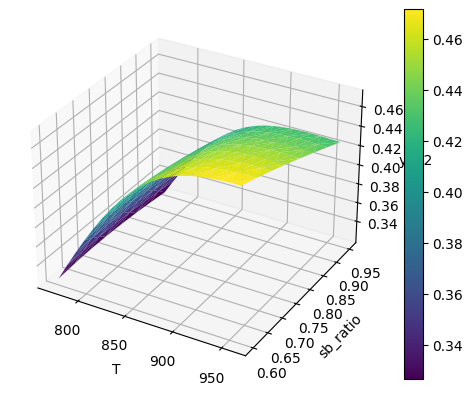

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = dadosN_M50_TA_450['T']
sb_ratio = dadosN_M50_TA_450['sb_ratio']
y_H2 = dadosN_M50_TA_450['y_H2']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('y_H2')

# Adicione uma barra de cores
fig.colorbar(surface)

# Mostre o gráfico
plt.show()

<ipython-input-13-2604dba36b42>:33: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


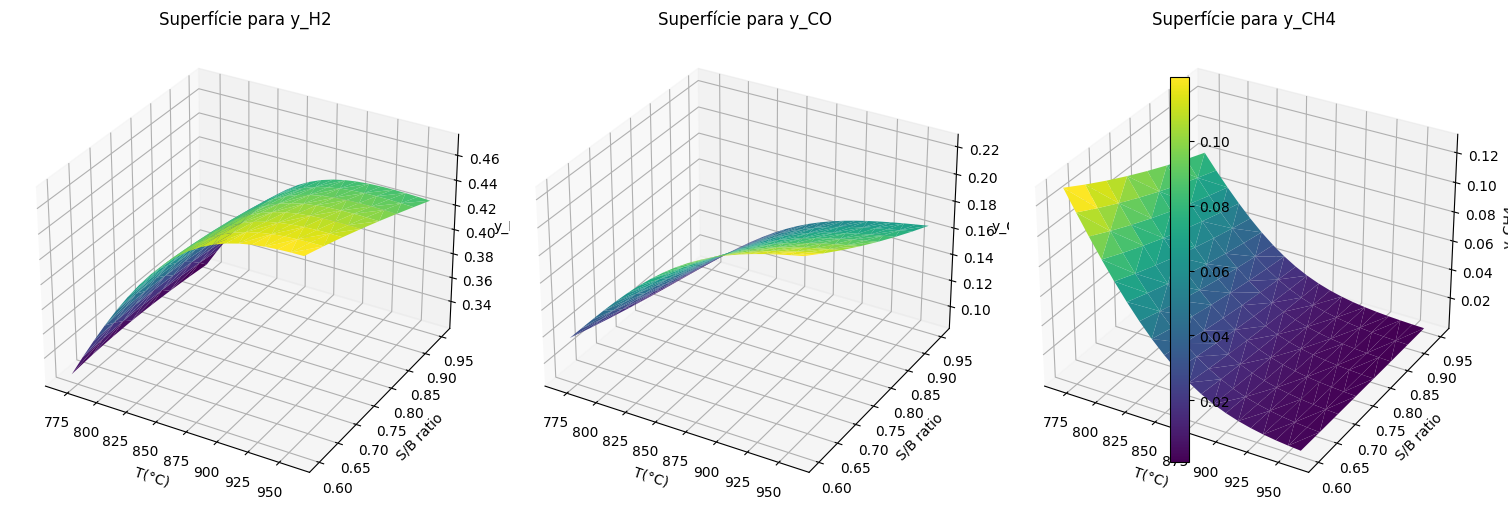

In [ ]:

# Crie uma figura 3D com subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Valores constantes para T e sb_ratio
T = dadosN_M50_TA_450['T']
sb_ratio = dadosN_M50_TA_450['sb_ratio']

# Lista das colunas que você deseja plotar
variables = ['y_H2', 'y_CO', 'y_CH4']

# Loop através das variáveis e crie os subplots
for i, variable in enumerate(variables):
    ax = axes[i]

    # Extraia a variável correspondente do DataFrame
    z = dadosN_M50_TA_450[variable]

    # Crie o gráfico de superfície para a variável atual
    surface = ax.plot_trisurf(T, sb_ratio, z, cmap='viridis')

    # Adicione rótulos aos eixos
    ax.set_xlabel('T(°C)')
    ax.set_ylabel('S/B ratio')
    ax.set_zlabel(variable)

    # Adicione um título ao subplot
    ax.set_title(f'Superfície para {variable}')

# Adicione uma barra de cores comum para todos os subplots
fig.colorbar(surface, ax=axes)

# Ajuste o layout dos subplots
plt.tight_layout()

# Mostre os subplots
plt.show()

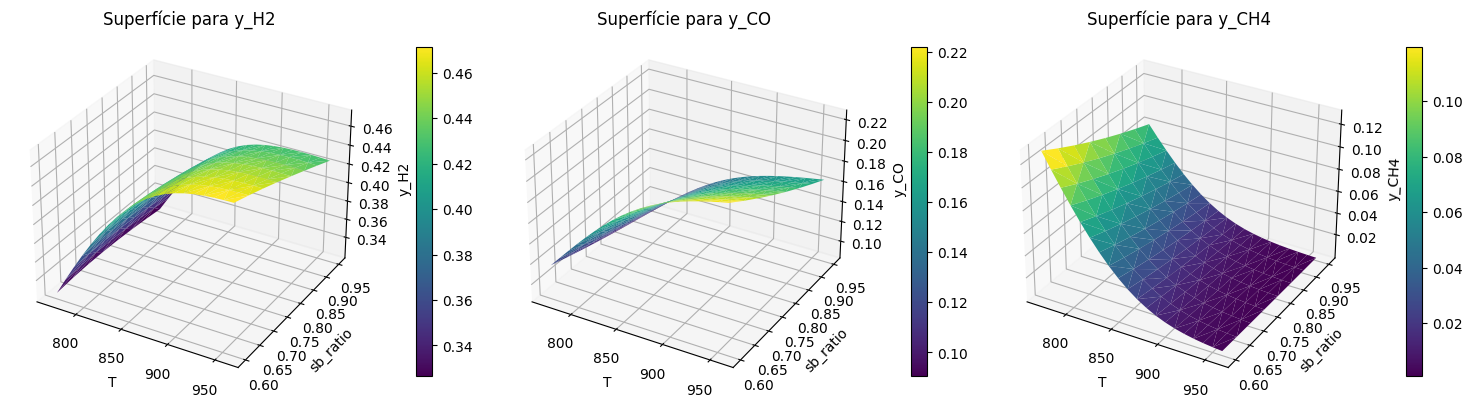

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

df = dadosN_M50_TA_450

# Supondo que você já tenha seu DataFrame df com os dados

# Crie uma figura 3D com subplots e ajuste o tamanho
fig = plt.figure(figsize=(15, 5))

# Valores constantes para T e sb_ratio
T = df['T']
sb_ratio = df['sb_ratio']

# Lista das colunas que você deseja plotar
variables = ['y_H2', 'y_CO', 'y_CH4']

# Loop através das variáveis e crie os subplots
for i, variable in enumerate(variables):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Extraia a variável correspondente do DataFrame
    z = df[variable]

    # Crie o gráfico de superfície para a variável atual
    surface = ax.plot_trisurf(T, sb_ratio, z, cmap='viridis')

    # Adicione rótulos aos eixos com rotação horizontal
    ax.set_xlabel('T')
    ax.set_ylabel('sb_ratio', rotation=90)  # Rotação horizontal
    ax.set_zlabel(variable, rotation=90)     # Rotação horizontal

    # Ajuste a posição e tamanho da barra de cores
    cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)
    # cbar.set_label(variable)

    # Adicione um título ao subplot
    ax.set_title(f'Superfície para {variable}')

# Ajuste o layout dos subplots
plt.tight_layout()

# Mostre os subplots
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Supondo que você já tenha seu DataFrame df com os dados

# Crie uma figura 3D com subplots e ajuste o tamanho
fig = plt.figure(figsize=(15, 5))

# Valores constantes para T e sb_ratio
T = df['T']
sb_ratio = df['sb_ratio']

# Lista das colunas que você deseja plotar
variables = ['y_H2', 'y_CO', 'y_CH4']

# Loop através das variáveis e crie os subplots
for i, variable in enumerate(variables):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')

    # Extraia a variável correspondente do DataFrame
    z = df[variable]

    # Crie o gráfico de superfície para a variável atual
    surface = ax.plot_trisurf(T, sb_ratio, z, cmap='viridis')

    # Adicione rótulos aos eixos com rotação horizontal
    ax.set_xlabel('T')
    ax.set_ylabel('sb_ratio', rotation=0)  # Rotação horizontal
    ax.set_zlabel(variable, rotation=0)     # Rotação horizontal

    # Adicione um título ao subplot com a identificação
    ax.set_title(f'({chr(97 + i)}) Superfície para {variable}')

# Ajuste o layout dos subplots
plt.tight_layout()

# Mostre os subplots
plt.show()

# Conversão de carbono

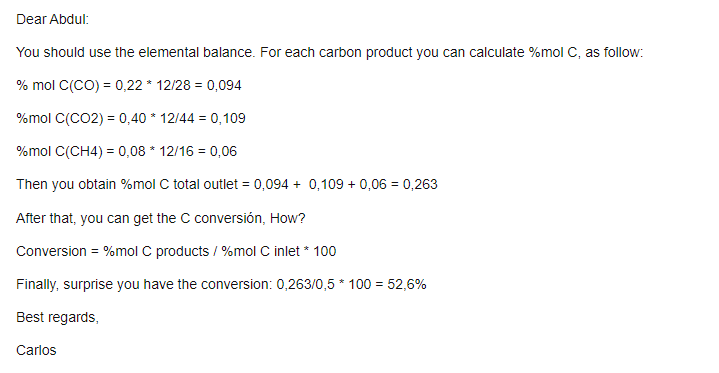

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Suponha que você tenha um dataframe chamado 'dados'
# Substitua esta linha pelo seu dataframe real
dados = pd.read_csv("/content/drive/MyDrive/pasta_dados/df_final.csv")

dadosN = dados.iloc[:, [1] + [2] + [6] + [11] + [12] + list(range(31, 37))]

dadosN_770 = dadosN[(dadosN['T']) >= 770]

In [ ]:
df = dadosN_770
# Crie a nova coluna "CC" com base na fórmula fornecida
df['CC'] = ((1-((df['y_CO'] * (12 / 28) + df['y_CO2'] * (12 / 44) + df['y_CH4'] * (12 / 16)) / (df['Carbon']/100)-0.05)))
df.head()

<ipython-input-99-73a290c1d29f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CC'] = ((1-((df['y_CO'] * (12 / 28) + df['y_CO2'] * (12 / 44) + df['y_CH4'] * (12 / 16)) / (df['Carbon']/100)-0.05)))


,T,Moisture,Carbon,Temp_air,sb_ratio,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O,CC
128,770.0,50.0,46.7,400.0,0.60,0.116609,0.217006,0.323727,0.129617,0.000047,0.212994,0.608092
129,770.0,50.0,46.7,400.0,0.65,0.111397,0.212716,0.325343,0.121290,0.000045,0.229209,0.628753
130,770.0,50.0,46.7,400.0,0.70,0.106486,0.208340,0.326084,0.113492,0.000043,0.245555,0.648339
131,770.0,50.0,46.7,400.0,0.75,0.101852,0.203917,0.326055,0.106195,0.000042,0.261940,0.666894
132,770.0,50.0,46.7,400.0,0.80,0.097473,0.199481,0.325357,0.099373,0.000040,0.278276,0.684459


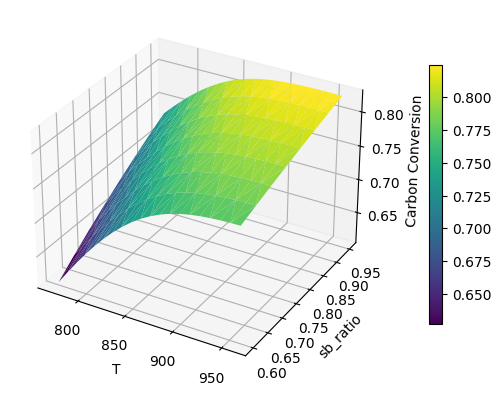

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_1 = df[(df['Moisture'] == 50.0) & (df['Temp_air'] == 400.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_1['T']
sb_ratio = df_1['sb_ratio']
y_H2 = df_1['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

In [ ]:
dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Temp_air'] == 450.0)]

df =  dadosN_M50_TA_450
df_2 = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))
df_2.head()

<ipython-input-54-47da4cc25fa6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))


,T,Moisture,Carbon,Temp_air,sb_ratio,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O,CC
152,770.0,18.4,33.9,450.0,0.60,0.155010,0.099302,0.442560,0.025192,0.001285,0.276651,0.718409
153,770.0,18.4,33.9,450.0,0.65,0.146664,0.099618,0.435897,0.021826,0.001233,0.294762,0.736153
154,770.0,18.4,33.9,450.0,0.70,0.138857,0.099702,0.428722,0.018953,0.001184,0.312582,0.752311
155,770.0,18.4,33.9,450.0,0.75,0.131553,0.099586,0.421179,0.016495,0.001138,0.330048,0.767076
156,770.0,18.4,33.9,450.0,0.80,0.124716,0.099301,0.413385,0.014389,0.001096,0.347113,0.780609


In [ ]:
df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)].head()

,T,Moisture,Carbon,Temp_air,sb_ratio,y_CO,y_CO2,y_H2,y_CH4,y_N2,y_H2O,CC
152,770.0,18.4,33.9,450.0,0.60,0.155010,0.099302,0.442560,0.025192,0.001285,0.276651,0.718409
153,770.0,18.4,33.9,450.0,0.65,0.146664,0.099618,0.435897,0.021826,0.001233,0.294762,0.736153
154,770.0,18.4,33.9,450.0,0.70,0.138857,0.099702,0.428722,0.018953,0.001184,0.312582,0.752311
155,770.0,18.4,33.9,450.0,0.75,0.131553,0.099586,0.421179,0.016495,0.001138,0.330048,0.767076
156,770.0,18.4,33.9,450.0,0.80,0.124716,0.099301,0.413385,0.014389,0.001096,0.347113,0.780609


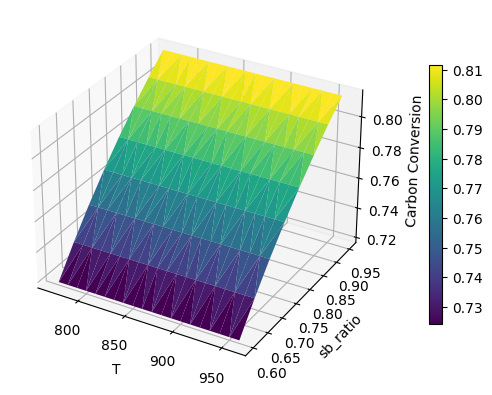

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

df_2 = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]

# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_2['T']
sb_ratio = df_2['sb_ratio']
y_H2 = df_2['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

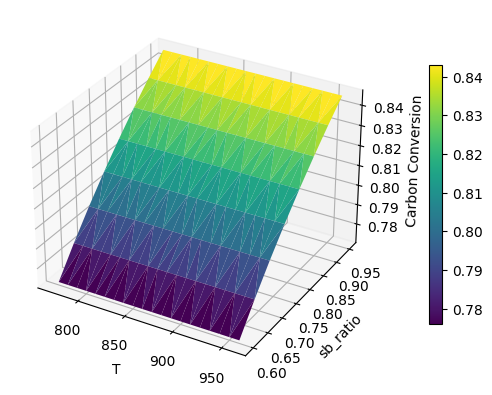

In [ ]:
df_3 = df[(df['Moisture'] == 31.3) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]


# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_3['T']
sb_ratio = df_3['sb_ratio']
y_H2 = df_3['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

In [ ]:
dadosN_M50_TA_450.Moisture.unique()

array([50.  , 18.4 , 31.3 ,  8.88,  7.73, 49.16,  9.23, 60.29,  5.22,
        8.4 ,  7.79,  6.9 ,  9.7 ,  8.1 ,  7.32,  8.3 ])

<ipython-input-106-c239552b4b73>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))


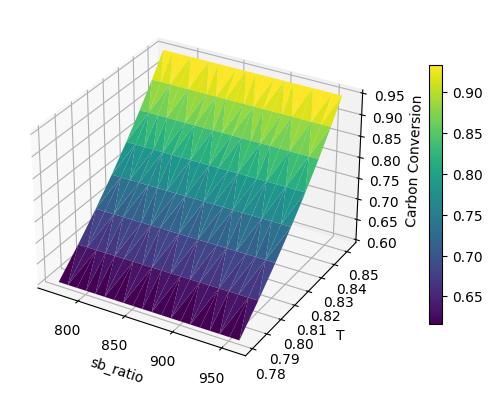

In [ ]:
dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Temp_air'] == 450.0)]

df =  dadosN_M50_TA_450
df_2 = df[(df['Moisture'] == 8.88) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))
df_2.head()


# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_2['T']
sb_ratio = df_2['CC']
y_H2 = df_2['sb_ratio']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('sb_ratio')
ax.set_ylabel('T')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

<ipython-input-107-abc91b97e299>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))


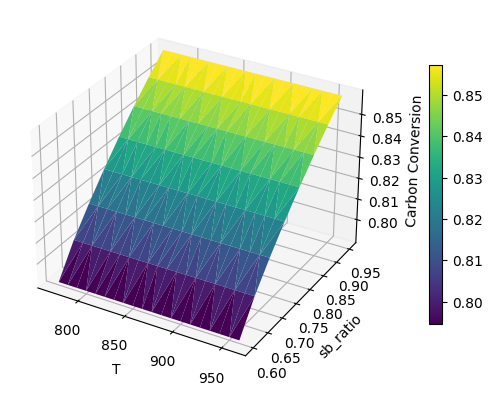

In [ ]:
dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Temp_air'] == 450.0)]

moisture = [50.0, 18.4, 31.3, 8.88, 7.73, 49.16, 7.23, 6.29]

df =  dadosN_770
df_2 = df[(df['Moisture'] == 7.73) & (df['Temp_air'] == 500.0) & (df['T'] >= 770.0)]
df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))
df_2.head()


# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_2['T']
sb_ratio = df_2['sb_ratio']
y_H2 = df_2['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

<ipython-input-108-80157d3752a7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))


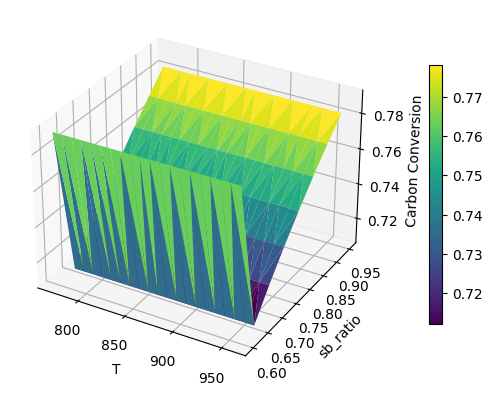

In [ ]:
dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Temp_air'] == 450.0)]

moisture = [50.0, 18.4, 31.3, 8.88, 7.73, 49.16, 7.23, 6.29]

df =  dadosN_770
df_2 = df[(df['Moisture'] == 49.16) & (df['Temp_air'] == 500.0) & (df['T'] >= 770.0)]
df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))
df_2.head()


# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_2['T']
sb_ratio = df_2['sb_ratio']
y_H2 = df_2['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

ValueError: ignored

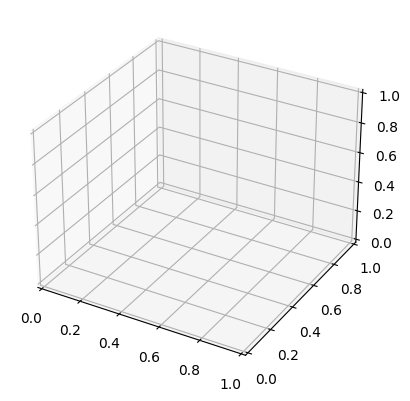

In [ ]:
dadosN_M50_TA_450 = dadosN_770[(dadosN_770['Temp_air'] == 450.0)]

moisture = [50.0, 18.4, 31.3, 8.88, 7.73, 49.16, 7.23, 6.29]

df =  dadosN_770
df_2 = df[(df['Moisture'] ==  6.29) & (df['Temp_air'] == 500.0) & (df['T'] >= 770.0)]
df_2['CC'] = ((1-((df_2['y_CO'] * (12 / 28) + df_2['y_CO2'] * (12 / 44) + df_2['y_CH4'] * (12 / 16)) / (df_2['Carbon']/100)-0.05)))
df_2.head()


# df = df[(df['Moisture'] == 18.4) & (df['Temp_air'] == 450.0) & (df['T'] >= 770.0)]
# Crie uma figura 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extraia as colunas do DataFrame
T = df_2['T']
sb_ratio = df_2['sb_ratio']
y_H2 = df_2['CC']

# Crie o gráfico de superfície
surface = ax.plot_trisurf(T, sb_ratio, y_H2, cmap='viridis')

# Adicione rótulos aos eixos
ax.set_xlabel('T')
ax.set_ylabel('sb_ratio')
ax.set_zlabel('Carbon Conversion', rotation=90)

# Adicione uma barra de cores
cbar = fig.colorbar(surface, ax=ax, pad=0.1, shrink=0.7)

# Mostre o gráfico
plt.show()

# Novo Teste

In [19]:
X = dadosN[['T', 'Moisture', 'Fixed_Carbon', 'Volatile_Material', 'Ash', 'Carbon', 'Hydrogen', 'Nitrogen', 'Sulfur', 'Oxygen', 'Temp_air', 'sb_ratio']].values
y = dadosN['y_H2'].values

In [20]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [22]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(12,)),  # 12 recursos de entrada
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # 1 saída para y_H2
])


In [23]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [24]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(12,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer='adam', loss='mean_squared_error')

    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32, validation_data=(X_val_fold, y_val_fold), verbose=0)

    cv_scores.append(np.sqrt(history.history['val_loss'][-1]))

print("RMSE médio na validação cruzada:", np.mean(cv_scores))


RMSE médio na validação cruzada: 0.009933220873455616


In [25]:
test_loss = model.evaluate(X_test, y_test)
print("Perda no conjunto de teste:", test_loss)

42/42 [==============================] - 0s 2ms/step - loss: 8.7448e-05
Perda no conjunto de teste: 8.744754450162873e-05


In [26]:
from sklearn.metrics import r2_score

# Após treinar o modelo, faça previsões no conjunto de teste
predictions = model.predict(X_test)

# Calcule o R² usando as previsões e os rótulos reais
r_squared = r2_score(y_test, predictions)

print("R²:", r_squared)

42/42 [==============================] - 0s 1ms/step
R²: 0.9510700770035461


168/168 [==============================] - 0s 1ms/step


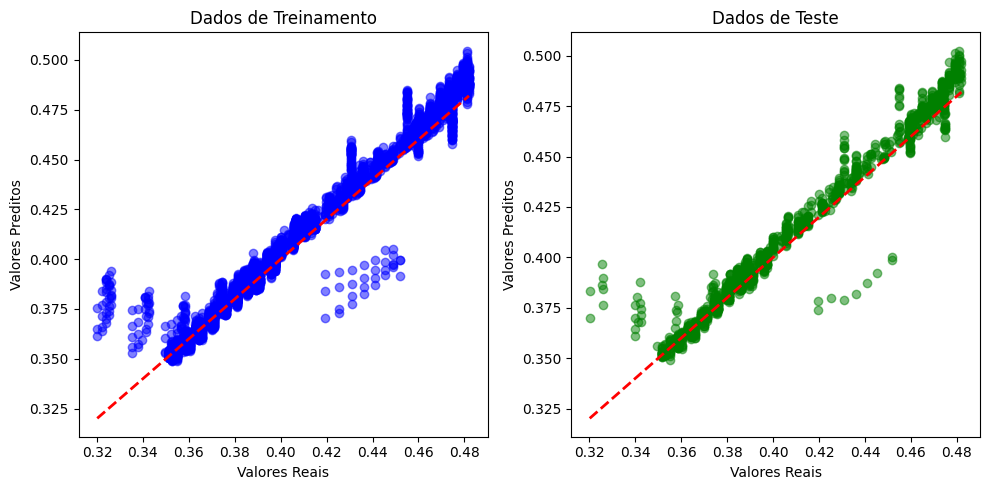

In [27]:
# Gráfico para dados de treinamento
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # Cria uma grade de 1x2 subplots (1 linha, 2 colunas), primeiro subplot

# Valores reais versus valores preditos para dados de treinamento
plt.scatter(y_train, model.predict(X_train), color='blue', alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Dados de Treinamento")

# Gráfico para dados de teste
plt.subplot(1, 2, 2)  # Segundo subplot

# Valores reais versus valores preditos para dados de teste
plt.scatter(y_test, predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.xlabel("Valores Reais")
plt.ylabel("Valores Preditos")
plt.title("Dados de Teste")

# Ajustar o layout dos subplots
plt.tight_layout()

# Exibir os gráficos
plt.show()